In [1]:
import numpy as np
from model import loadTruncatedModel, getLayerDict
from optimization import getIterateFunction, gradientAscent
import matplotlib.pyplot as plt
import time
from scipy import signal
import IPython.display as ipd
import librosa

Using TensorFlow backend.


In [2]:
 #We load the trained VGG model
pathToModel = "model/model_VGG16_11_12_2018.h5"
sampleAu,fs = librosa.load("/home/badrdr/Dev/AudioDNN/VGGTraining/genres/blues/blues.00010.au")

model = loadTruncatedModel(pathToModel)
layerDict = getLayerDict(model)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [9]:
#Corresponds to the size of the training mel spectrogram
    
imgWidth, imgHeight = 100, 100

In [16]:
keptFilters = []
    
inputTensor = model.input
layerName = 'block4_conv1'

print("Percentage : ")
for filterIndex in range(512):
    print('-{}-'.format(filterIndex/512*100),end="")
    startTime = time.time()

    iterate = getIterateFunction(layerDict, layerName, filterIndex, inputTensor)
    
    #inputImgData = (np.random.random((1, imgWidth, imgHeight, 3)) - 0.5) * 20 + 128
    inputImgData = np.zeros((1, imgWidth, imgHeight, 3))
    
    step = 0.1

    lossValue = gradientAscent(iterate, inputImgData, step)

    print('Current loss value:', lossValue)

    if lossValue > 0.:
        print("kept!",end="")
        keptFilters.append((inputImgData[0,:,:,0], lossValue))
        if len(keptFilters) == 5:
            break
    endTime = time.time()
    #print('Filter %d processed in %ds' % (filterIndex, endTime - startTime))

Percentage : 
-0.0-failedCurrent loss value: 0.0
-0.1953125-failedCurrent loss value: 0.0
-0.390625-failedCurrent loss value: 0.0
-0.5859375-failedCurrent loss value: 0.0
-0.78125-failedCurrent loss value: 0.0
-0.9765625-failedCurrent loss value: 0.0
-1.171875-failedCurrent loss value: 0.0
-1.3671875-failedCurrent loss value: 0.0
-1.5625-failedCurrent loss value: 0.0
-1.7578125-failedCurrent loss value: 0.0
-1.953125-failedCurrent loss value: 0.0
-2.1484375-failedCurrent loss value: 0.0
-2.34375-failedCurrent loss value: 0.0
-2.5390625-failedCurrent loss value: 0.0
-2.734375-failedCurrent loss value: 0.0
-2.9296875-failedCurrent loss value: 0.0
-3.125-failedCurrent loss value: 0.0
-3.3203125-failedCurrent loss value: 0.0
-3.515625-failedCurrent loss value: 0.0
-3.7109375-failedCurrent loss value: 0.0
-3.90625-failedCurrent loss value: 0.0
-4.1015625-failedCurrent loss value: 0.0
-4.296875-failedCurrent loss value: 0.0
-4.4921875-failedCurrent loss value: 0.0
-4.6875-failedCurrent loss 

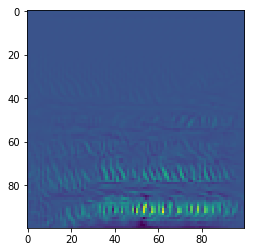

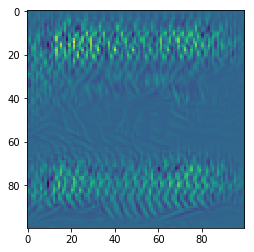

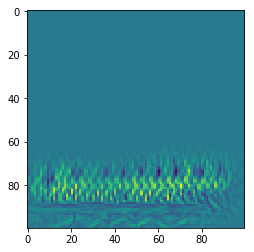

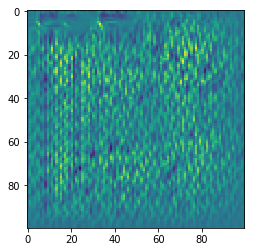

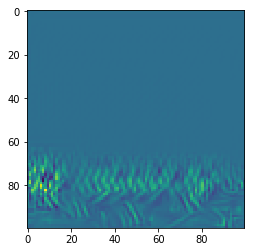

In [17]:
for img in keptFilters:
    plt.figure()
    plt.imshow(img[0])

In [15]:
for i in range(len(keptFilters)):
    rever = signal.istft(keptFilters[i][0], fs=22050, nperseg=198)
    ipd.display(ipd.Audio(rever, rate=22050))